# Landmark Beijing Tech Session
- March 9, 2021

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import tensorflow.keras as keras

In [6]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

In [7]:
tf.__version__

'2.4.1'

# Load our data

In [9]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
# X_train=X_train.astype('float32')/255
# X_test=X_test.astype('float32')/255

In [19]:
# X_train.shape

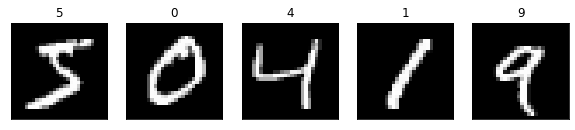

In [13]:
# Display some images
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [14]:
to_categorical(3, num_classes=10)


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Convert y_train into one-hot format
for example, digit 1 is (0,1,0,0,0,0,0,0,0,0,0)
                   2 is (0,0,1,0,0,0,0,0,0,0,0)

In [15]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [16]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# Create simple Neural Network model


In [17]:
# Create simple Neural Network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
# model.add(Dense(8, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 3925      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


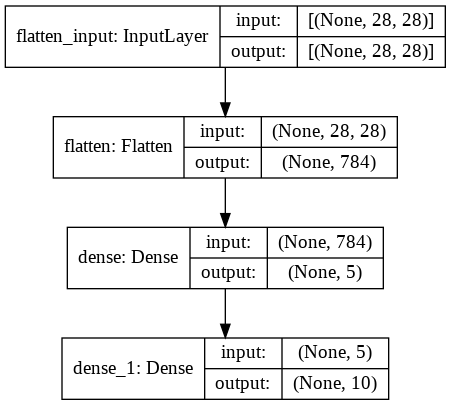

In [20]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

# define the loss function, optimizer and metrics we want to use in this task

In [21]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['acc'])

# Start training process!

In [22]:
history=model.fit(X_train, y_train, epochs=5, 
          validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9755 - acc: 0.3523 - val_loss: 1.4020 - val_acc: 0.5915
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3338 - acc: 0.6018 - val_loss: 1.1766 - val_acc: 0.6567
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1601 - acc: 0.6540 - val_loss: 1.0751 - val_acc: 0.6792
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0571 - acc: 0.6879 - val_loss: 0.9740 - val_acc: 0.7314
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0005 - acc: 0.7179 - val_loss: 0.9711 - val_acc: 0.7316


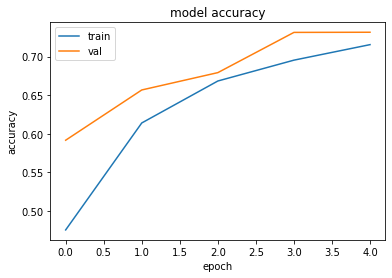

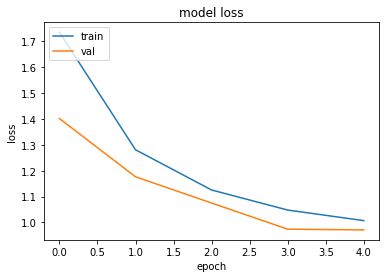

In [23]:
# history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

# Get training and test loss histories
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# start predicting

In [24]:
predictions = model.predict(X_test)
print(predictions)

[[4.3590430e-02 2.0887055e-03 2.0826499e-03 ... 8.6783171e-01
  2.7567840e-03 2.9003860e-02]
 [5.7982933e-02 2.8414631e-04 5.4493123e-01 ... 3.1135336e-04
  6.4147763e-02 1.3285836e-03]
 [6.2805586e-05 8.4414440e-01 1.5909026e-03 ... 1.4646390e-02
  3.2722745e-02 2.7543191e-02]
 ...
 [3.0508748e-04 3.7545051e-02 8.1528462e-03 ... 3.2691772e-03
  1.0490512e-01 1.3012047e-01]
 [3.4342243e-03 7.7775740e-03 1.1534982e-01 ... 2.2899579e-04
  6.5408355e-01 1.3745796e-02]
 [1.9564167e-02 1.0471124e-02 1.7428625e-01 ... 2.2862989e-03
  3.2796074e-02 4.6094018e-04]]


In [25]:
predictions.shape

(10000, 10)

In [26]:
predictions[0]

array([0.04359043, 0.00208871, 0.00208265, 0.01643814, 0.00151863,
       0.03060784, 0.00408124, 0.8678317 , 0.00275678, 0.02900386],
      dtype=float32)

In [ ]:
X_test.shape

(10000, 28, 28)

In [27]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 8 6]


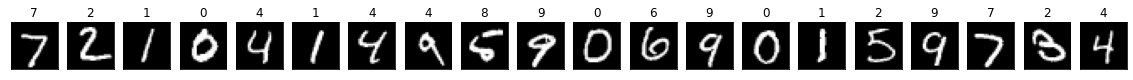

In [28]:
fig, axes = plt.subplots(ncols=20, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(20):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
#### pip install opencv-python

# How can we revise the model so it can predict digit 0-9 and the character "h" (only h)?
# 如何修改我们的神经网络模型，使它除了可以识别手写数字，还能识别小写字母h (只需要认识h)？